# Lab 07

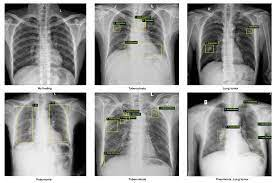

## I. Train mô hình
### 1. Load dữ liệu

In [2]:
import glob
import numpy as np
import cv2

IMG_SIZE = 227

def load_dataset(path):
    X = []
    y = []
    classes = ['NORMAL', 'PNEUMONIA']

    for c in classes:
        files = glob.glob(path + c + "/*.jpeg")
        for f in files:
            print(f)  # In ra tên file để theo dõi
            img = cv2.imread(f)

            # Kiểm tra xem ảnh có được đọc thành công không
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(classes.index(c))  # Sử dụng chỉ mục của lớp thay vì chuỗi

    assert len(X) == len(y), 'Inconsistent number of samples between X and y'

    return (np.array(X), np.array(y))

In [3]:
X_train, y_train = load_dataset("E:/Downloads E/chest_xray/train/")

E:/Downloads E/chest_xray/train/NORMAL\IM-0115-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0117-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0119-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0122-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0125-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0127-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0128-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0129-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0131-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0133-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0135-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0137-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0140-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0141-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0143-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0145-0001.jpeg
E:/Downloads E/chest_xray/train/NORMAL\IM-0147-0001.jpeg
E:/Downloads E/chest_xray/train

In [4]:
X_test, y_test = load_dataset("E:/Downloads E/chest_xray/test/")

E:/Downloads E/chest_xray/test/NORMAL\IM-0001-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0003-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0005-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0006-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0007-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0009-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0010-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0011-0001-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0011-0001-0002.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0011-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0013-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0015-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0016-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0017-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0019-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0021-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\IM-0022-0001.jpeg
E:/Downloads E/chest_xray/test/NORMAL\

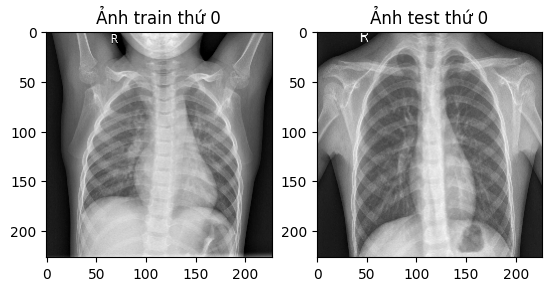

In [12]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.title("Ảnh train thứ 0")

plt.subplot(1,2,2)
plt.imshow(X_test[0])
plt.title("Ảnh test thứ 0")
plt.show()


In [13]:
# Kiểm tra chiều của X_Train và y_train có giống nhau chưa
X_train.shape

(5216, 227, 227, 3)

In [14]:
y_train.shape

(5216,)

### 2. Tiền xử lý và mã hóa dữ liệu

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

IMG_SIZE = 227

X_train_transformed = X_train.reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE*3)
X_test_transformed = X_test.reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE*3)

y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)


### 3. Huấn luyện mô hình

In [31]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=1000) 
lr_classifier.fit(X_train_transformed, y_train_transformed)


LogisticRegression(max_iter=1000)

### 4. Đánh giá mô hình

In [32]:
y_pred_lrc = lr_classifier.predict(X_test_transformed)

In [33]:
from sklearn.metrics import classification_report
lr_score = classification_report(y_test_transformed, y_pred_lrc , target_names=['NORMAL', 'PNEUMONIA'], zero_division=1)
print(lr_score)

              precision    recall  f1-score   support

      NORMAL       0.95      0.34      0.50       234
   PNEUMONIA       0.71      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.66      0.66       624
weighted avg       0.80      0.75      0.71       624



## II. Bài tập 
### 1. Bài tập 1
### a) Mục tiêu / tác vụ mà bộ dữ liệu hướng tới là gì?

> Bộ dữ liệu hướng đến việc nhận diện bệnh nhiễm khuẩn phổi từ ảnh X-Quang.

### b) Kích thước của dữ liệu là bao nhiêu trên tập train và test?


In [16]:
X_train.shape

(5216, 227, 227, 3)

In [17]:
X_test.shape

(624, 227, 227, 3)

In [18]:
y_train.shape

(5216,)

In [19]:
y_test.shape

(624,)

- X_train: Số lượng mẫu: 5216 Kích thước của mỗi ảnh: 227x227 pixel Số kênh màu: 3 (RGB)
- X_test: Số lượng mẫu: 624 Kích thước của mỗi ảnh: 227x227 pixel Số kênh màu: 3 (RGB)
- y_train: Số lượng mẫu: 5216
- y_test: Số lượng mẫu: 624

### c) Phân bố nhãn theo từng tác vụ trên tập train và test. Vẽ biểu đồ barplot thể hiện phân bố nhãn trên từng tập dữ liệu.


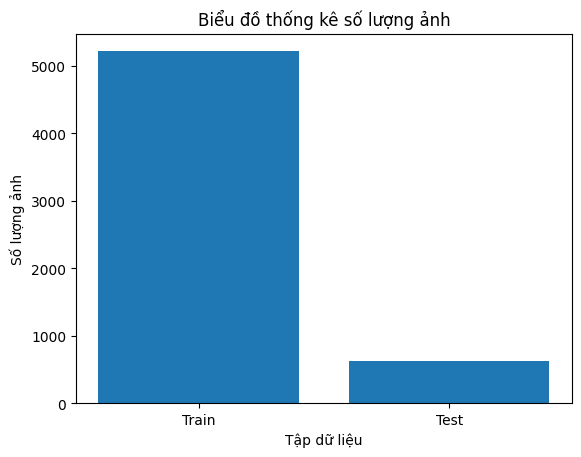

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(['Train', 'Test'], [len(X_train), len(X_test)])
plt.xlabel('Tập dữ liệu')
plt.ylabel('Số lượng ảnh')
plt.title('Biểu đồ thống kê số lượng ảnh')
plt.show()


### d) Hiển thị 2 bức hình về ảnh X-Quang phổi lên màn hình (mỗi tập 1 ảnh)

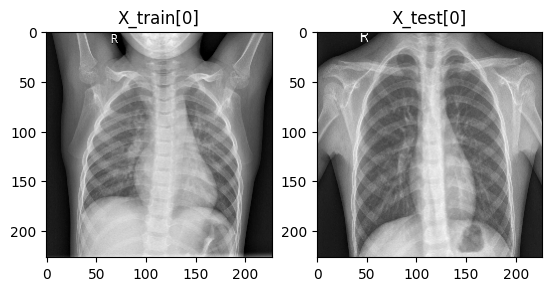

In [21]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('X_train[0]')
plt.subplot(1, 2, 2)
plt.imshow(X_test[0])
plt.title('X_test[0]')
plt.show()

### Bài tập 3

#### a) Rút trích đặc trưng ảnh trong các tập dữ liệu bằng cách sử dụng các loại đặc trưng: HOG, CANNY và FAST.
#### b) Xây dựng các mô hình phân lớp SVM và huấn luyện các mô hình bằng các vector đặc trưng HOG, CANNY và FAST.

### Đặc trưng HOG

In [35]:
#câu a
from skimage.feature import hog
def feature_hog(img):
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(11, 11),\
                      cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    return hog_image


In [37]:
X_train_hog = np.array([feature_hog(k) for k in X_train]).reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE)
X_test_hog = np.array([feature_hog(k) for k in X_test]).reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE)

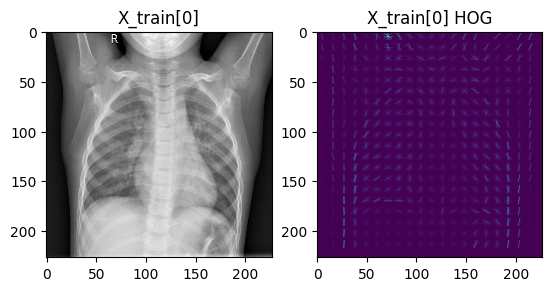

In [38]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('X_train[0]')
plt.subplot(1, 2, 2)
plt.imshow(feature_hog(X_train[0]))
plt.title('X_train[0] HOG')
plt.show()

In [39]:
#câu b
from sklearn import svm

svc_hog = svm.SVC(kernel='linear')

In [40]:
svc_hog.fit(X_train_hog, y_train_transformed)

SVC(kernel='linear')

In [41]:
y_pred_svc_hog = svc_hog.predict(X_test_hog)

In [42]:
svc_score = classification_report(y_test_transformed, y_pred_svc_hog , target_names=['NORMAL', 'PNEUMONIA'], zero_division=1)
print(svc_score)

              precision    recall  f1-score   support

      NORMAL       0.99      0.32      0.49       234
   PNEUMONIA       0.71      1.00      0.83       390

    accuracy                           0.75       624
   macro avg       0.85      0.66      0.66       624
weighted avg       0.81      0.75      0.70       624



### Đặc trưng CANNY

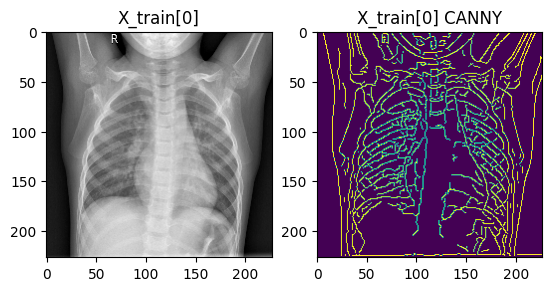

In [44]:
#câu a
from skimage.feature import canny

X_train_canny = np.array([canny(k[:,:,0]) for k in X_train]).reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE)
X_test_canny = np.array([canny(k[:,:,0]) for k in X_test]).reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE)

plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('X_train[0]')
plt.subplot(1, 2, 2)
plt.imshow(canny(X_train[0][:,:,0]))
plt.title('X_train[0] CANNY')
plt.show()

In [45]:
#câu b
from sklearn import svm

svc_canny = svm.SVC(kernel='linear')
svc_canny.fit(X_train_canny, y_train_transformed)

SVC(kernel='linear')

In [46]:
y_pred_svc_canny = svc_canny.predict(X_test_canny)

In [47]:
svc_score_2 = classification_report(y_test_transformed, y_pred_svc_canny , target_names=['NORMAL', 'PNEUMONIA'], zero_division=1)
print(svc_score_2)

              precision    recall  f1-score   support

      NORMAL       0.82      0.39      0.53       234
   PNEUMONIA       0.72      0.95      0.82       390

    accuracy                           0.74       624
   macro avg       0.77      0.67      0.68       624
weighted avg       0.76      0.74      0.71       624



### Đặc trưng FAST

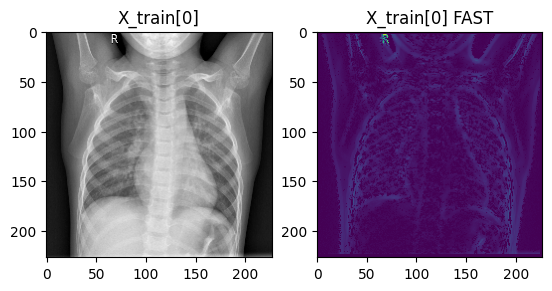

In [48]:
#câu a
from skimage.feature import corner_fast
def feature_fast(img):
  fast_image = corner_fast(img, n=8, threshold=0)

  return fast_image

X_train_fast = np.array([feature_fast(k[:,:,0]) for k in X_train]).reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE)
X_test_fast = np.array([feature_fast(k[:,:,0]) for k in X_test]).reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE)

plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('X_train[0]')
plt.subplot(1, 2, 2)
plt.imshow(feature_fast(X_train[0][:,:,0]))
plt.title('X_train[0] FAST')

plt.show()

In [49]:
#câu b
from sklearn import svm
svc_fast = svm.SVC(kernel='linear')
svc_fast.fit(X_train_fast, y_train_transformed)

SVC(kernel='linear')

In [51]:
y_pred_svc_fast = svc_fast.predict(X_test_fast)

In [52]:
svc_score_3 = classification_report(y_test_transformed, y_pred_svc_fast , target_names=['NORMAL', 'PNEUMONIA'], zero_division=1)
print(svc_score_3)

              precision    recall  f1-score   support

      NORMAL       0.97      0.35      0.52       234
   PNEUMONIA       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.67      0.68       624
weighted avg       0.81      0.75      0.72       624



### c) So sánh độ chính xác dự đoán của mô hình trong ba trường hợp:
- Sử dụng đặc trưng HOG.
- Sử dụng đặc trưng CANNY
- Sử dụng đặc trưng FASTT.

So sánh độ chính xác dự đoán của mô hình:
Độ chính xác đặc trưng HOG: 74.52%
Độ chính xác đặc trưng Canny: 74.04%
Độ chính xác đặc trưng FAST: 75.32%


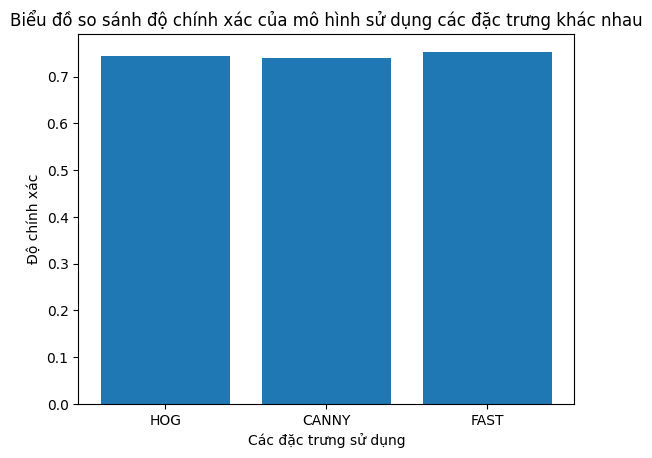

In [57]:
accuracy_hog = accuracy_score(y_test_transformed, y_pred_svc_hog)
accuracy_canny = accuracy_score(y_test_transformed, y_pred_svc_canny)
accuracy_fast = accuracy_score(y_test_transformed, y_pred_svc_fast)

print("So sánh độ chính xác dự đoán của mô hình:")
print(f"Độ chính xác đặc trưng HOG: {accuracy_hog * 100:.2f}%")
print(f"Độ chính xác đặc trưng Canny: {accuracy_canny * 100:.2f}%")
print(f"Độ chính xác đặc trưng FAST: {accuracy_fast * 100:.2f}%")

plt.bar(['HOG', 'CANNY','FAST'], [accuracy_hog , accuracy_canny ,accuracy_fast ])
plt.ylabel('Độ chính xác')
plt.xlabel('Các đặc trưng sử dụng')
plt.title('Biểu đồ so sánh độ chính xác của mô hình sử dụng các đặc trưng khác nhau')
plt.show()